In [174]:
# Load in libraries

import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

from experiment_code.constants import Defaults

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load in Participant Info

In [175]:
file_name = "Participant Info.csv"

df_info = pd.read_csv(os.path.join(Defaults.RAW_DIR, file_name))

## Load in subject dataframes and concatenate

In [176]:
# navigate to raw data folder
os.chdir(Defaults.RAW_DIR)

file_list = glob.glob("*cort_scaling*")

# make empty dataframe
df_all = pd.DataFrame()
# loop over each subject file
for file in file_list:
    # reading csv for subj
    df = pd.read_csv(file)
    cols = df.columns
    col_to_rename = cols[df.columns.str.find("CoRT")==0][0]
    df = df.rename(columns={col_to_rename: 'CoRT'})
    df['subj_id'] = re.findall(r'(s\w.)_', file)[0]
    # concats each subj together
    df_all = pd.concat([df_all, df], sort=True)
    
# merge df info dataframe and subj data dataframes
df_merged = df_all.merge(df_info, on='subj_id')


In [177]:
def extract_string(x):
    if type(x)==str:
#         value = x.str.extract('(\d+)')
        value = re.findall(r'\d+', x) 
        value = float(value[0])
    elif type(x)==float:
        value = x
    elif type(x)==int:
        value = float(x)
        
    return value

In [178]:
# clean up

df_merged['CoRT'] = df_merged['CoRT'].apply(lambda x: extract_string(x))

# drop nan values
# df_merged = df_merged.dropna()

## Visualization 

## Distribution of CoRT scores broken down by group (expert versus novice)

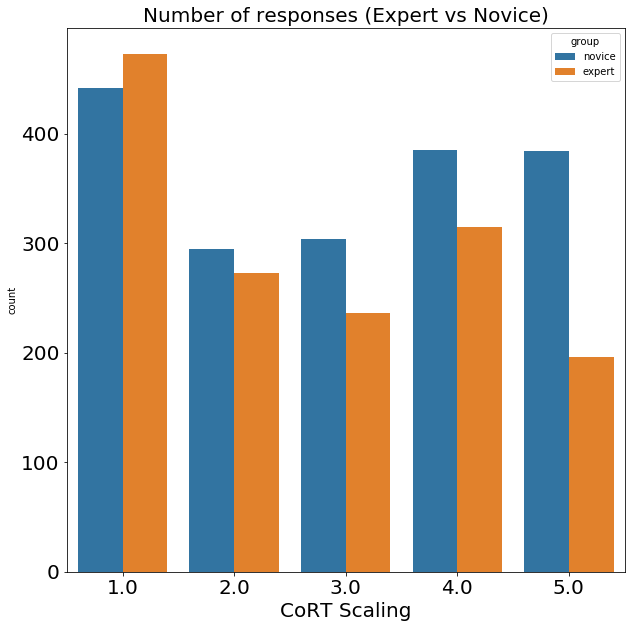

In [179]:
plt.figure(figsize=(10,10))

sns.countplot(x='CoRT', hue='group', data=df_merged)
plt.xlabel('CoRT Scaling', fontsize=20)
plt.title('Number of responses (Expert vs Novice)', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

## Distribution of cloze probabilities

In [186]:
df_cloze = pd.read_csv(os.path.join(Defaults.STIM_DIR, "Block_Baldwin_2010.csv"))

# clean up - rename and drop cols
df_cloze = df_cloze.rename({'Present (2010)':'cloze', 'Sentence Stem': 'sentence', 'Response':'response'}, axis=1).drop({'Response.1', 'B&F (1980)'}, axis=1)

# add cloze prob to cort scores
df_cloze_cort = df_merged.merge(df_cloze, left_on="Sentence Stem", right_on="sentence")

df_cloze_cort = df_cloze_cort.dropna()


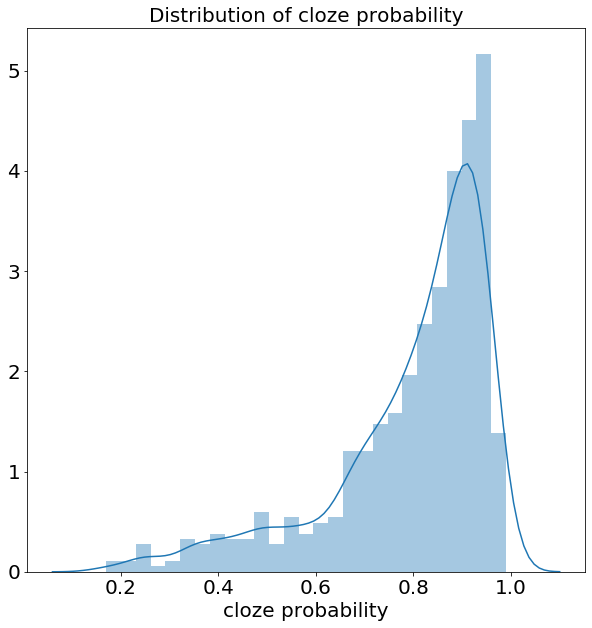

In [189]:
# Visualize distribution of cloze probability

plt.figure(figsize=(10,10))

sns.distplot(df_cloze_cort['cloze'])
plt.xlabel('cloze probability', fontsize=20)
plt.title('Distribution of cloze probability', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

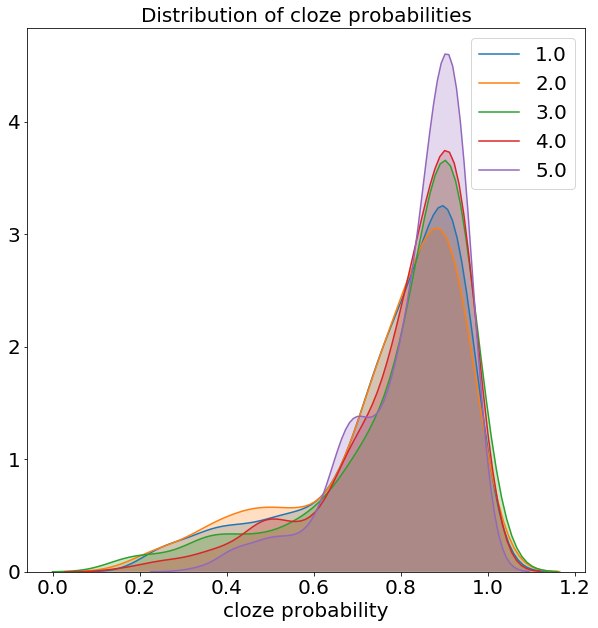

In [190]:
cort_scores = df_cloze_cort['CoRT'].unique()

plt.figure(figsize=(10,10))

# plot histogram of cloze probabilities for each cort scale
for cort in cort_scores:
#     plt.figure()
    sns.kdeplot(df_cloze_cort.loc[df_cloze_cort['CoRT']==cort]['cloze'], shade=True)
    plt.title(f'Distribution of cloze probabilities', fontsize=20)
    plt.xlabel('cloze probability', fontsize=20)
    plt.legend(cort_scores, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)